# Funciones de distribución de probabilidades
## Distribución Uniforme

In [43]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [15]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([100159.,  99606.,  99421.,  99864.,  99804.,  99915., 100297.,
        100348., 100225., 100361.]),
 array([ 1.00000292, 10.89996049, 20.79991807, 30.69987565, 40.59983322,
        50.4997908 , 60.39974838, 70.29970595, 80.19966353, 90.09962111,
        99.99957868]),
 <a list of 10 Patch objects>)

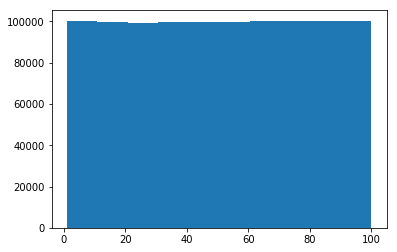

In [16]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [24]:
data = np.random.randn(1000000)

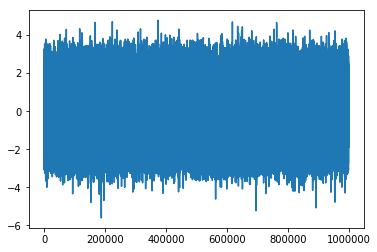

In [31]:
x = range(1,1000001)
plt.plot(x, data)

(array([7.00000e+00, 1.76000e+02, 6.10100e+03, 6.69350e+04, 2.65940e+05,
        3.94335e+05, 2.17925e+05, 4.51050e+04, 3.39500e+03, 8.10000e+01]),
 array([-5.60316173, -4.56527912, -3.52739651, -2.4895139 , -1.45163129,
        -0.41374868,  0.62413394,  1.66201655,  2.69989916,  3.73778177,
         4.77566438]),
 <a list of 10 Patch objects>)

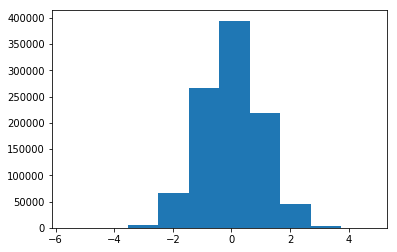

In [28]:
%matplotlib inline
plt.hist(data)

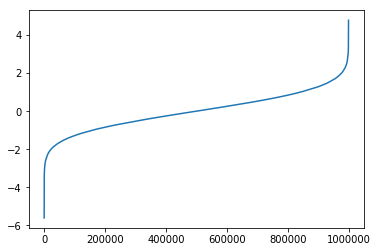

In [32]:
plt.plot(x,sorted(data))

(array([   6.,   32.,  281., 1180., 2576., 3118., 1960.,  711.,  123.,
          13.]),
 array([-5.12280629, -3.11658208, -1.11035788,  0.89586633,  2.90209053,
         4.90831474,  6.91453894,  8.92076315, 10.92698735, 12.93321156,
        14.93943576]),
 <a list of 10 Patch objects>)

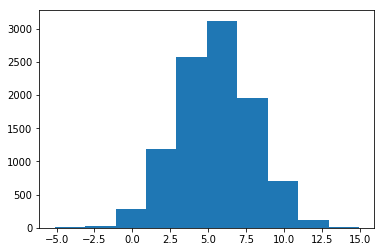

In [34]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [35]:
data = np.random.randn(2,4)
data

array([[-2.0037831 , -0.21771535, -1.90002375,  0.88870408],
       [-0.93380982, -0.94088418,  0.38366571, -0.0243514 ]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos x^2 + y^2
    * Si el valor es inferior a 1 -> estamos dentro del círculo.
    * Si el valor es superior a 1 -> estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [41]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.141549999999997


(3.141549999999997, [<matplotlib.lines.Line2D at 0x116d47a20>])

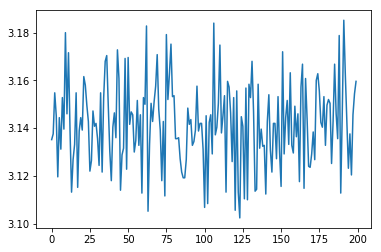

In [42]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [47]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [49]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,0.000239,1.499385,18.469332
std,0.999032,2.498255,7.792416
min,-4.808515,-10.816448,5.000018
25%,-0.673233,-0.185435,11.709981
50%,0.001055,1.498496,18.461919
75%,0.675847,3.183562,25.217279
max,5.064791,13.143170,32.000000


(array([5.90000e+01, 2.24800e+03, 2.99250e+04, 1.62936e+05, 3.55487e+05,
        3.17335e+05, 1.14403e+05, 1.66540e+04, 9.30000e+02, 2.30000e+01]),
 array([-4.80851462, -3.82118406, -2.83385349, -1.84652292, -0.85919236,
         0.12813821,  1.11546877,  2.10279934,  3.09012991,  4.07746047,
         5.06479104]),
 <a list of 10 Patch objects>)

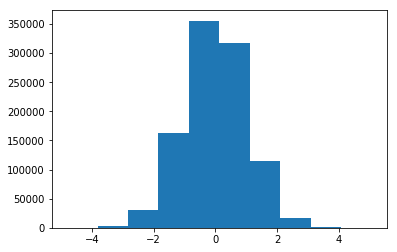

In [50]:
plt.hist(data["A"])

(array([2.70000e+01, 1.20700e+03, 1.87870e+04, 1.17181e+05, 3.09940e+05,
        3.48185e+05, 1.67357e+05, 3.42040e+04, 3.00800e+03, 1.04000e+02]),
 array([-10.81644789,  -8.4204861 ,  -6.02452431,  -3.62856252,
         -1.23260073,   1.16336106,   3.55932285,   5.95528464,
          8.35124643,  10.74720821,  13.14317   ]),
 <a list of 10 Patch objects>)

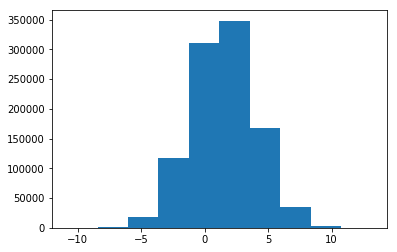

In [51]:
plt.hist(data["B"])

(array([100314., 100992., 100276.,  99833.,  99972., 100306.,  99547.,
         99831., 100141.,  98788.]),
 array([ 5.00001823,  7.7000164 , 10.40001457, 13.10001273, 15.8000109 ,
        18.50000907, 21.20000724, 23.9000054 , 26.60000357, 29.30000174,
        31.99999991]),
 <a list of 10 Patch objects>)

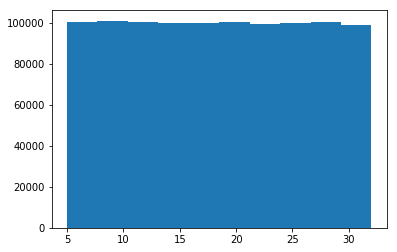

In [52]:
plt.hist(data["C"])

In [53]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [54]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [55]:
colum_names = data.columns.values.tolist()

In [57]:
a = len(colum_names)
a

21

In [60]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [61]:
new_data

,A,B,Column Name
42,0.745216,0.666901,State
43,0.978430,0.445809,Account Length
44,1.731687,0.099869,Area Code
45,-1.045452,0.774833,Phone
46,-1.990031,0.104624,Int'l Plan
47,1.402830,0.956325,VMail Plan
48,-0.469498,0.604139,VMail Message
49,-0.100384,0.058382,Day Mins
50,0.176315,0.864266,Day Calls
51,-1.062312,0.013515,Day Charge
